In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv(r"Real estate.csv")

# Display the first few rows of the DataFrame
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
# Rename columns for ease of access
df.columns = ['No', 'Date', 'Age', 'Distance to the nearest MRT station', 'Convenience stores', 'Latitude', 'Longitude', 'House price of unit area']

# Check updated column names
df.head()


,No,Date,Age,Distance to the nearest MRT station,Convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Combine Latitude and Longitude into a new 'Location' column
df['Location'] = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)

# Drop the 'Latitude' and 'Longitude' columns
df.drop(columns=['Latitude', 'Longitude'], inplace=True)

# Check the updated DataFrame
df.head()


,No,Date,Age,Distance to the nearest MRT station,Convenience stores,House price of unit area,Location
0,1,2012.917,32.0,84.87882,10,37.9,"24.98298, 121.54024"
1,2,2012.917,19.5,306.59470,9,42.2,"24.98034, 121.53951"
2,3,2013.583,13.3,561.98450,5,47.3,"24.98746, 121.54391"
3,4,2013.500,13.3,561.98450,5,54.8,"24.98746, 121.54391"
4,5,2012.833,5.0,390.56840,5,43.1,"24.97937, 121.54245"


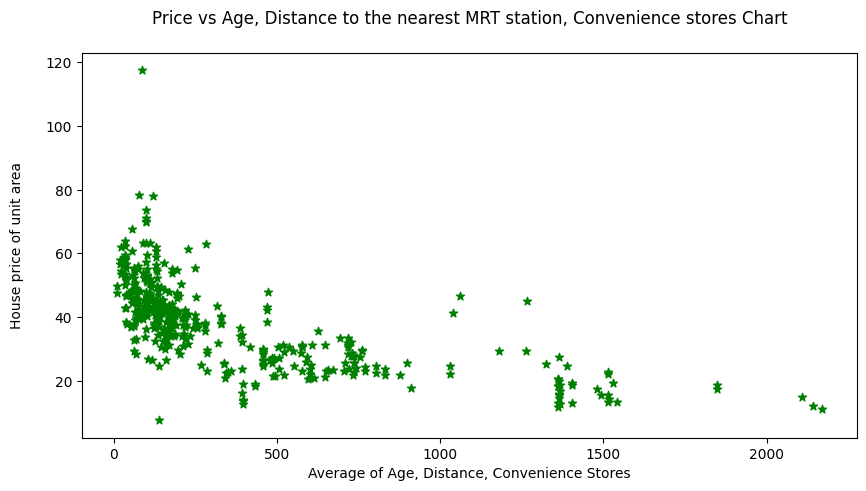

In [4]:
plt.figure(figsize=(10, 5))
plt.title("Price vs Age, Distance to the nearest MRT station, Convenience stores Chart\n")
plt.xlabel("Average of Age, Distance, Convenience Stores")
plt.ylabel("House price of unit area\n")

# Calculate the mean of the three features
adc_mean = df[['Age', 'Distance to the nearest MRT station', 'Convenience stores']].mean(axis=1)

# Plot the data
plt.scatter(adc_mean, df['House price of unit area'], color="green", marker="*")
plt.show()


In [5]:
# Initialize the Linear Regression model
reg = LinearRegression()

# Train the model on the relevant features
reg.fit(df[['Age', 'Distance to the nearest MRT station', 'Convenience stores']], df['House price of unit area'])


LinearRegression()

In [6]:
def predict_and_update():
    global df, reg
    
    # Take user input for Age, Distance to MRT station, Convenience stores, and Area of the house
    try:
        age = float(input("Enter house age: "))
        distance_to_mrt = float(input("Enter distance to the nearest MRT station: "))
        convenience_stores = int(input("Enter number of convenience stores: "))
        area_of_house = float(input("Enter the area of the house (in square units): "))
    except ValueError:
        print("Please enter valid numeric values.")
        return
    
    # Combine input into a list
    info = [age, distance_to_mrt, convenience_stores]
    
    # Predict the price per unit area for the given input
    info_reshaped = np.array(info).reshape(1, -1)
    predicted_price_per_unit_area = reg.predict(info_reshaped)[0]
    
    # Calculate the total house price
    total_price = predicted_price_per_unit_area * area_of_house
    
    print(f"Predicted Price Per Unit Area: {predicted_price_per_unit_area}")
    print(f"Total House Price (for {area_of_house} units): {total_price}")
    
    # Add the new data to the DataFrame
    new_data = pd.DataFrame({
        'Age': [age],
        'Distance to the nearest MRT station': [distance_to_mrt],
        'Convenience stores': [convenience_stores],
        'House price of unit area': [predicted_price_per_unit_area]
    })
    
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)
    
    # Retrain the model with the updated DataFrame
    reg.fit(df[['Age', 'Distance to the nearest MRT station', 'Convenience stores']], df['House price of unit area'])
    
    return total_price


In [7]:
# Call the function to predict and update the DataFrame
predict_and_update()

Predicted Price Per Unit Area: 54.11898999200548
Total House Price (for 45.0 units): 2435.3545496402467


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2435.3545496402467

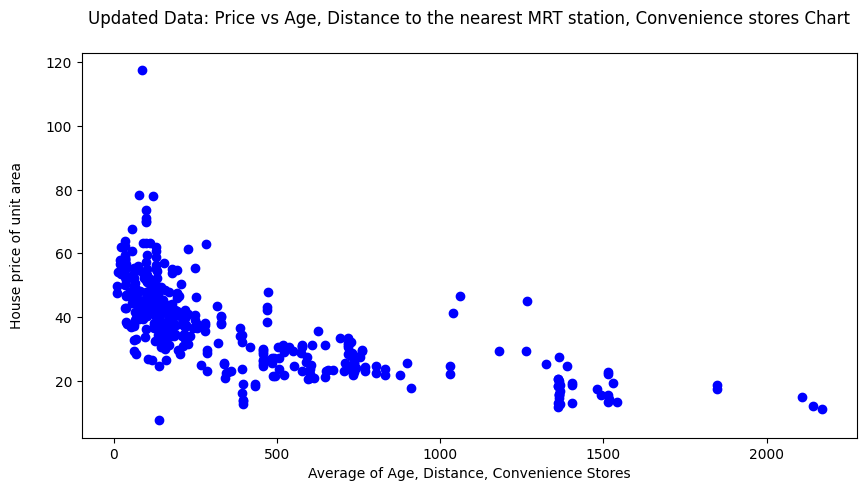

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Updated Data: Price vs Age, Distance to the nearest MRT station, Convenience stores Chart\n")
plt.xlabel("Average of Age, Distance, Convenience Stores")
plt.ylabel("House price of unit area\n")

# Recalculate the mean of the features
adc_mean_updated = df[['Age', 'Distance to the nearest MRT station', 'Convenience stores']].mean(axis=1)

# Plot the updated data
plt.scatter(adc_mean_updated, df['House price of unit area'], color="blue", marker="o")
plt.show()
